In [1]:
#first import and set up file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [2]:
## Load in the merged SF EUI/SF Property Info Map Data
datafile = "merged_SF_EUI_SF_Info_Map_df.csv"
df=pd.read_csv(datafile)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,parcel_index,Postal Code,Full_Address_clean,Building Name_clean,Energy Audit Status_clean,Benchmark 2015 Status_clean,Property Type - Self Selected_clean,Datetime Next Audit Due,Datetime Energy Audit Due,Energy Audit Status_clean.1,2015 Weather Normalized Site EUI (kBtu/ft2),address_cl,land_value_cl,structure_value_cl,fixtures_value_cl,p_prop_value_cl,basement_cl,last_sale_cl,last_sale_price_cl,year_built_cl,building_area_cl,parcel_area_cl,parcel_shape_cl,parcel_frontage_cl,parcel_depth_cl,const_typ_cl,use_typ_cl,units_cl,stories_cl,rooms_cl,bathrooms_cl,bedrooms_cl,last_sale_datetime_cl
0,0,1575,0012/007A,94133,"243 JEFFERSON ST San Francisco, CA 94133 (37.8...",DiMaggio Building,Complied,Complied,Restaurant,NaN,2014-04-01,Complied,250.0,243 JEFFERSON ST,1.448e+06,5.150e+05,NaN,828.0,NaN,NaN,NaN,1937.0,15397.0,10312.50,Rectangular,NaN,75.0,NaN,NaN,1.0,2.0,11.0,4.0,NaN,NaN
1,1,638,0013/005,94133,"2720 TAYLOR ST San Francisco, CA 94133 (37.807...",Savoy Corporation,Complied,Complied,Office,2018-04-01,2013-04-01,Complied,67.1,2720 TAYLOR ST,2.576e+06,3.056e+06,NaN,NaN,NaN,NaN,NaN,1974.0,54068.0,18906.25,Square,NaN,37.5,NaN,NaN,11.0,4.0,15.0,12.0,NaN,NaN
2,2,149,0013/006,94133,"2770 TAYLOR ST San Francisco, CA 94133 (37.807...",2770 TAYLOR ST,Did Not Comply,Violation - Did Not Report,NaN,NaN,2013-04-01,Did Not Comply,NaN,2770 TAYLOR ST,1.548e+06,2.204e+06,NaN,NaN,NaN,NaN,NaN,1966.0,40017.0,13750.00,Rectangular,NaN,NaN,NaN,NaN,4.0,3.0,30.0,7.0,NaN,NaN
3,3,1484,0013/009,94133,"2601 MASON ST San Francisco, CA 94133 (37.8077...",2601 MASON ST,Did Not Comply,Violation - Did Not Report,NaN,NaN,2013-04-01,Did Not Comply,NaN,2601 MASON ST,7.844e+05,7.885e+05,NaN,NaN,NaN,3/31/2014,1.360e+07,1959.0,15882.0,15154.00,NaN,NaN,NaN,NaN,Motels,51.0,3.0,63.0,51.0,NaN,2014-03-31
4,4,921,0013/016,94133,"145 Jefferson St San Francisco, CA 94133 (37.8...",The Way Museum Building,Complied,Complied,Museum,NaN,2014-04-01,Complied,111.9,107 SITUS TO BE ASSIGNED ST,1.613e+06,2.830e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['use_typ_cl'].unique()

array([nan, 'Motels', 'Office', 'Hotel', 'Condominium', 'Misc',
       'Industrial', 'Bank', 'Churches,Convents,Rectories', 'Hospitals',
       'Schools', 'Theatres'], dtype=object)

In [5]:
df['Property Type - Self Selected_clean'].unique()

array(['Restaurant', 'Office', nan, 'Museum', 'Hotel',
       'College/University', 'Social/Meeting Hall', 'Adult Education',
       'Manufacturing/Industrial Plant', 'Other - Recreation', 'Other',
       'Urgent Care/Clinic/Other Outpatient', 'Bank Branch',
       'Mixed Use Property', 'Other - Services', 'Retail Store',
       'Worship Facility', 'Hospital (General Medical & Surgical)',
       'Financial Office', 'Senior Care Community', 'Medical Office',
       'Personal Services (Health/Beauty, Dry Cleaning, etc.)',
       'Performing Arts', 'Other - Entertainment/Public Assembly',
       'Parking', 'Strip Mall', 'K-12 School', 'Pre-school/Daycare',
       'Supermarket/Grocery Store', 'Other - Mall',
       'Fitness Center/Health Club/Gym', 'Veterinary Office',
       'Automobile Dealership',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Enclosed Mall',
       'Movie Theater', 'Food Service', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Wholesale Clu

In [6]:
df['Property Type - Self Selected_clean'].value_counts()

Office                                                   637
Hotel                                                    125
Retail Store                                              74
Non-Refrigerated Warehouse                                46
Other                                                     46
Mixed Use Property                                        39
Worship Facility                                          25
Supermarket/Grocery Store                                 24
College/University                                        22
Medical Office                                            20
Manufacturing/Industrial Plant                            14
Distribution Center                                       13
Restaurant                                                12
K-12 School                                               10
Automobile Dealership                                     10
Movie Theater                                              9
Fitness Center/Health Cl

In [7]:
df['year_built_cl'].describe()

count    1450.000
mean     1944.599
std       165.910
min      1853.000
25%      1911.000
50%      1926.000
75%      1965.000
max      6889.000
Name: year_built_cl, dtype: float64

In [8]:
# Delete year built >2017

df = df.loc[df['year_built_cl']<=2017,:]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1792
Data columns (total 35 columns):
Unnamed: 0                                     1448 non-null int64
Unnamed: 0.1                                   1448 non-null int64
parcel_index                                   1448 non-null object
Postal Code                                    1448 non-null int64
Full_Address_clean                             1448 non-null object
Building Name_clean                            1448 non-null object
Energy Audit Status_clean                      1447 non-null object
Benchmark 2015 Status_clean                    1448 non-null object
Property Type - Self Selected_clean            1000 non-null object
Datetime Next Audit Due                        293 non-null object
Datetime Energy Audit Due                      1447 non-null object
Energy Audit Status_clean.1                    1447 non-null object
2015 Weather Normalized Site EUI (kBtu/ft2)    978 non-null float64
address_cl   

In [10]:
df.shape

(1448, 35)

In [11]:

all_vals_y_data = df.dropna(subset = ['2015 Weather Normalized Site EUI (kBtu/ft2)'])

In [12]:
x_complete_all_vals_y_data = all_vals_y_data.dropna(axis = 1)

In [13]:
x_complete_all_vals_y_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 1791
Data columns (total 10 columns):
Unnamed: 0                                     978 non-null int64
Unnamed: 0.1                                   978 non-null int64
parcel_index                                   978 non-null object
Postal Code                                    978 non-null int64
Full_Address_clean                             978 non-null object
Building Name_clean                            978 non-null object
Benchmark 2015 Status_clean                    978 non-null object
Property Type - Self Selected_clean            978 non-null object
2015 Weather Normalized Site EUI (kBtu/ft2)    978 non-null float64
year_built_cl                                  978 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 84.0+ KB


In [14]:
x_complete_all_vals_y_data = pd.get_dummies(x_complete_all_vals_y_data, columns=['Property Type - Self Selected_clean'])

In [15]:
x_complete_all_vals_y_data.drop('Unnamed: 0', axis=1, inplace=True)
x_complete_all_vals_y_data.drop('Unnamed: 0.1', axis=1, inplace=True)
x_complete_all_vals_y_data.drop('Full_Address_clean', axis=1, inplace=True)
x_complete_all_vals_y_data.drop('Building Name_clean', axis=1, inplace=True)


In [16]:
x_complete_all_vals_y_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 1791
Data columns (total 53 columns):
parcel_index                                                                                 978 non-null object
Postal Code                                                                                  978 non-null int64
Benchmark 2015 Status_clean                                                                  978 non-null object
2015 Weather Normalized Site EUI (kBtu/ft2)                                                  978 non-null float64
year_built_cl                                                                                978 non-null float64
Property Type - Self Selected_clean_Adult Education                                          978 non-null uint8
Property Type - Self Selected_clean_Automobile Dealership                                    978 non-null uint8
Property Type - Self Selected_clean_Bank Branch                                              978 non-nul

In [17]:
#remove all rows where we don't have the value to predict - ie y value - 2015 Weather Normalized Site EUI
df = df.dropna(subset = ['2015 Weather Normalized Site EUI (kBtu/ft2)'])


In [18]:
# There appears to be one NA in Energy Audit Status_clean - fill with Did Not Comply
df['Energy Audit Status_clean'] = df['Energy Audit Status_clean'].fillna('Did Not Comply')


In [19]:
#duplicate column drop
df.drop('Energy Audit Status_clean.1', axis=1, inplace=True)
#Looks like Datetime Next Audit due is garbage - remove column
df.drop('Datetime Next Audit Due', axis=1, inplace=True)

In [20]:
df['parcel_shape_cl'].value_counts()

Rectangular    334
Other          255
Square          15
Name: parcel_shape_cl, dtype: int64

In [21]:
#need to make new datetime column for last sale
df['last_sale_datetime_cl'] = pd.to_datetime(df['last_sale_cl'], format = "%m/%d/%Y")
#need to make new datetime column for energy audit due date
df['Datetime Energy Audit Due'] = pd.to_datetime(df['Datetime Energy Audit Due'], format = "%Y-%m-%d")
#drop other string object
df.drop('last_sale_cl', axis = 1, inplace = True)
#drop bedrooms due to limited data
df.drop('bedrooms_cl', axis = 1, inplace = True)

In [22]:
df['const_typ_cl'].value_counts().index[0]

'Special'

In [23]:
#Datetime Energy Audit Due has one missing value - fill with most frequent value
df['Datetime Energy Audit Due'] = df['Datetime Energy Audit Due'].fillna(df['Datetime Energy Audit Due'].value_counts().index[0])
#there appears to be missing land values - fill with mean(land values)
df['land_value_cl'] = df['land_value_cl'].fillna(df['land_value_cl'].mean())
#there appears to be missing parcel area values - fill with mean(parcel_area/building_area)*building_area
df['parcel_area_cl'] = df['parcel_area_cl'].fillna(df['parcel_area_cl'].mean())
#there appears to be missing use type values - fill with Unknown
df['use_typ_cl'] = df['use_typ_cl'].fillna('Unknown')
#there appears to be missing self reported use type values - fill with Unknown
df['Property Type - Self Selected_clean'] = df['Property Type - Self Selected_clean'].fillna('Unknown')
#there are missing address_cl values - even though we won't use this for prediction, fill in with Unknown
df['address_cl'] = df['address_cl'].fillna('Unknown')
#Fill missing Building Areas
df['building_area_cl'] = df['building_area_cl'].fillna(((df['building_area_cl'].mean())/(df['parcel_area_cl'].mean()))*(df['parcel_area_cl']))
#Fill missing structure values with mean(structure_val/building_area)*building_area - DO THIS AFTER FILLING BUILDING AREA
df['structure_value_cl'] = df['structure_value_cl'].fillna((df['structure_value_cl'].mean())/(df['building_area_cl'].mean())*(df['building_area_cl']))
#Fill missing fixture values with mean(fixure_val/building_area)*building_area - DO THIS AFTER FILLING BUILDING AREA
df['fixtures_value_cl'] = df['fixtures_value_cl'].fillna((df['fixtures_value_cl'].mean())/(df['building_area_cl'].mean())*(df['building_area_cl']))
#Fill missing p_prop values with mean(p_prop_val/building_area)*building_area - DO THIS AFTER FILLING BUILDING AREA
df['p_prop_value_cl'] = df['p_prop_value_cl'].fillna((df['p_prop_value_cl'].mean())/(df['building_area_cl'].mean())*(df['building_area_cl']))
#Fill missing basement_cl values with mean(basement_cl/building_area)*building_area - DO THIS AFTER FILLING BUILDING AREA
df['basement_cl'] = df['basement_cl'].fillna((df['basement_cl'].mean())/(df['building_area_cl'].mean())*(df['building_area_cl']))
#Fill missing sale dates with first known value - ie oldest record
df['last_sale_datetime_cl'] = df['last_sale_datetime_cl'].fillna(df['last_sale_datetime_cl'].sort_values()[1791])
#Fill missing parcel_shape data with Rectangle
df['parcel_shape_cl'] = df['parcel_shape_cl'].fillna('Rectanglular')
#Fill missing parcel depth with (mean(depth)/mean(land_area))*landarea
df['parcel_depth_cl'] = df['parcel_depth_cl'].fillna(((df['parcel_depth_cl'].mean())/(df['parcel_area_cl'].mean()))*(df['parcel_area_cl']))



In [24]:
#Fill missing parcel frontage with (mean(depth)/mean(land_area))*landarea
df['parcel_frontage_cl'] = df['parcel_frontage_cl'].fillna((df['parcel_frontage_cl'].mean())/(df['parcel_area_cl'].mean())*(df['parcel_area_cl']))
#Fill missing last_sale_price with mean of (sale_price/building_area)*building_area
df['last_sale_price_cl'] = df['last_sale_price_cl'].fillna(((df['last_sale_price_cl'].mean())/(df['building_area_cl'].mean()))*(df['building_area_cl']))
#Fill missing const_typ with most frequent
df['const_typ_cl'] = df['const_typ_cl'].fillna(df['const_typ_cl'].value_counts().index[0])
#Fill missing units with mean(units/buildingarea)*buildingarea
df['units_cl'] = df['units_cl'].fillna(((df['units_cl']/df['building_area_cl']).mean())*df['building_area_cl'])
#Fill missing stories with mean(stories/buildingarea)*buildingarea
df['stories_cl'] = df['stories_cl'].fillna(((df['stories_cl']/df['building_area_cl']).mean())*df['building_area_cl'])
#Fill missing rooms with mean(rooms/buildingarea)*buildingarea
df['rooms_cl'] = df['rooms_cl'].fillna(((df['rooms_cl']/df['building_area_cl']).mean())*df['building_area_cl'])
#Fill missing bathrooms with mean(bathrooms/buildingarea)*buildingarea
df['bathrooms_cl'] = df['bathrooms_cl'].fillna(((df['bathrooms_cl']/df['building_area_cl']).mean())*df['building_area_cl'])


In [25]:
df['land_value_cl'].describe()

count    9.780e+02
mean     9.684e+06
std      2.145e+07
min      1.903e+04
25%      7.899e+05
50%      2.268e+06
75%      7.507e+06
max      2.344e+08
Name: land_value_cl, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 1791
Data columns (total 31 columns):
Unnamed: 0                                     978 non-null int64
Unnamed: 0.1                                   978 non-null int64
parcel_index                                   978 non-null object
Postal Code                                    978 non-null int64
Full_Address_clean                             978 non-null object
Building Name_clean                            978 non-null object
Energy Audit Status_clean                      978 non-null object
Benchmark 2015 Status_clean                    978 non-null object
Property Type - Self Selected_clean            978 non-null object
Datetime Energy Audit Due                      978 non-null datetime64[ns]
2015 Weather Normalized Site EUI (kBtu/ft2)    978 non-null float64
address_cl                                     978 non-null object
land_value_cl                                  978 non-null float64
structure_value_

In [27]:
df = pd.get_dummies(df, columns=['Property Type - Self Selected_clean'])
df = pd.get_dummies(df, columns=['Energy Audit Status_clean'])
df = pd.get_dummies(df, columns=['use_typ_cl'])
df = pd.get_dummies(df, columns = ['const_typ_cl'])
df = pd.get_dummies(df, columns = ['parcel_shape_cl'])
df = pd.get_dummies(df, columns = ['Benchmark 2015 Status_clean'])

In [28]:
df['last_sale_datetime_cl'] = pd.to_numeric(df['last_sale_datetime_cl'])
df['Datetime Energy Audit Due'] = pd.to_numeric(df['Datetime Energy Audit Due'])

In [29]:
df['last_sale_datetime_cl'].describe()

count    9.780e+02
mean     6.029e+17
std      5.933e+17
min     -2.652e+16
25%     -2.652e+16
50%      7.969e+17
75%      1.168e+18
max      1.483e+18
Name: last_sale_datetime_cl, dtype: float64

In [30]:
df['Energy Audit Status_clean_Complied'].value_counts()

1    779
0    199
Name: Energy Audit Status_clean_Complied, dtype: int64

In [31]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'parcel_index',
 'Postal Code',
 'Full_Address_clean',
 'Building Name_clean',
 'Datetime Energy Audit Due',
 '2015 Weather Normalized Site EUI (kBtu/ft2)',
 'address_cl',
 'land_value_cl',
 'structure_value_cl',
 'fixtures_value_cl',
 'p_prop_value_cl',
 'basement_cl',
 'last_sale_price_cl',
 'year_built_cl',
 'building_area_cl',
 'parcel_area_cl',
 'parcel_frontage_cl',
 'parcel_depth_cl',
 'units_cl',
 'stories_cl',
 'rooms_cl',
 'bathrooms_cl',
 'last_sale_datetime_cl',
 'Property Type - Self Selected_clean_Adult Education',
 'Property Type - Self Selected_clean_Automobile Dealership',
 'Property Type - Self Selected_clean_Bank Branch',
 'Property Type - Self Selected_clean_Bar/Nightclub',
 'Property Type - Self Selected_clean_College/University',
 'Property Type - Self Selected_clean_Data Center',
 'Property Type - Self Selected_clean_Distribution Center',
 'Property Type - Self Selected_clean_Enclosed Mall',
 'Property Type - Self Selected_clean_F

In [32]:
#Separate our features from our target for linear regression model

X=df.loc[:,['Postal Code',
 'Datetime Energy Audit Due',
 'land_value_cl',
 'structure_value_cl',
 'fixtures_value_cl',
 'p_prop_value_cl',
 'basement_cl',
 'last_sale_price_cl',
 'year_built_cl',
 'building_area_cl',
 'parcel_area_cl',
 'parcel_frontage_cl',
 'parcel_depth_cl',
 'units_cl',
 'stories_cl',
 'rooms_cl',
 'bathrooms_cl',
 'last_sale_datetime_cl',
 'Property Type - Self Selected_clean_Adult Education',
 'Property Type - Self Selected_clean_Automobile Dealership',
 'Property Type - Self Selected_clean_Bank Branch',
 'Property Type - Self Selected_clean_Bar/Nightclub',
 'Property Type - Self Selected_clean_College/University',
 'Property Type - Self Selected_clean_Data Center',
 'Property Type - Self Selected_clean_Distribution Center',
 'Property Type - Self Selected_clean_Enclosed Mall',
 'Property Type - Self Selected_clean_Financial Office',
 'Property Type - Self Selected_clean_Fitness Center/Health Club/Gym',
 'Property Type - Self Selected_clean_Food Sales',
 'Property Type - Self Selected_clean_Food Service',
 'Property Type - Self Selected_clean_Hospital (General Medical & Surgical)',
 'Property Type - Self Selected_clean_Hotel',
 'Property Type - Self Selected_clean_K-12 School',
 'Property Type - Self Selected_clean_Laboratory',
 'Property Type - Self Selected_clean_Manufacturing/Industrial Plant',
 'Property Type - Self Selected_clean_Medical Office',
 'Property Type - Self Selected_clean_Mixed Use Property',
 'Property Type - Self Selected_clean_Movie Theater',
 'Property Type - Self Selected_clean_Museum',
 'Property Type - Self Selected_clean_Non-Refrigerated Warehouse',
 'Property Type - Self Selected_clean_Office',
 'Property Type - Self Selected_clean_Other',
 'Property Type - Self Selected_clean_Other - Education',
 'Property Type - Self Selected_clean_Other - Entertainment/Public Assembly',
 'Property Type - Self Selected_clean_Other - Mall',
 'Property Type - Self Selected_clean_Other - Recreation',
 'Property Type - Self Selected_clean_Other - Restaurant/Bar',
 'Property Type - Self Selected_clean_Other - Services',
 'Property Type - Self Selected_clean_Parking',
 'Property Type - Self Selected_clean_Performing Arts',
 'Property Type - Self Selected_clean_Personal Services (Health/Beauty, Dry Cleaning, etc.)',
 'Property Type - Self Selected_clean_Pre-school/Daycare',
 'Property Type - Self Selected_clean_Refrigerated Warehouse',
 'Property Type - Self Selected_clean_Repair Services (Vehicle, Shoe, Locksmith, etc.)',
 'Property Type - Self Selected_clean_Restaurant',
 'Property Type - Self Selected_clean_Retail Store',
 'Property Type - Self Selected_clean_Self-Storage Facility',
 'Property Type - Self Selected_clean_Senior Care Community',
 'Property Type - Self Selected_clean_Social/Meeting Hall',
 'Property Type - Self Selected_clean_Strip Mall',
 'Property Type - Self Selected_clean_Supermarket/Grocery Store',
 'Property Type - Self Selected_clean_Urgent Care/Clinic/Other Outpatient',
 'Property Type - Self Selected_clean_Veterinary Office',
 'Property Type - Self Selected_clean_Vocational School',
 'Property Type - Self Selected_clean_Wholesale Club/Supercenter',
 'Property Type - Self Selected_clean_Worship Facility',
 'Energy Audit Status_clean_Complied',
 'Energy Audit Status_clean_Did Not Comply',
 'Energy Audit Status_clean_Exempt',
 'Energy Audit Status_clean_Exempt - Building demolition',
 'Energy Audit Status_clean_Exempt - ENERGY STAR',
 'Energy Audit Status_clean_Exempt - LEED EBOM',
 'Energy Audit Status_clean_Exempt - Tenant Turnover',
 'Energy Audit Status_clean_Exempt - Vacant',
 'Energy Audit Status_clean_Exempt - ZNE Certified',
 'Energy Audit Status_clean_Municipal',
 'Energy Audit Status_clean_Pending',
 'Energy Audit Status_clean_Upcoming',
 'use_typ_cl_Bank',
 'use_typ_cl_Churches,Convents,Rectories',
 'use_typ_cl_Hospitals',
 'use_typ_cl_Hotel',
 'use_typ_cl_Industrial',
 'use_typ_cl_Misc',
 'use_typ_cl_Motels',
 'use_typ_cl_Office',
 'use_typ_cl_Schools',
 'use_typ_cl_Theatres',
 'use_typ_cl_Unknown',
 'const_typ_cl_Frame',
 'const_typ_cl_Special',
 'const_typ_cl_Steel',
 'parcel_shape_cl_Other',
 'parcel_shape_cl_Rectanglular',
 'parcel_shape_cl_Rectangular',
 'parcel_shape_cl_Square',
 'Benchmark 2015 Status_clean_Complied']]

y=df['2015 Weather Normalized Site EUI (kBtu/ft2)']

In [33]:
#Split the data 70-30 train/test - use train_test_split skikitlearn package

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [34]:
X_train.columns

Index(['Postal Code', 'Datetime Energy Audit Due', 'land_value_cl',
       'structure_value_cl', 'fixtures_value_cl', 'p_prop_value_cl',
       'basement_cl', 'last_sale_price_cl', 'year_built_cl',
       'building_area_cl', 'parcel_area_cl', 'parcel_frontage_cl',
       'parcel_depth_cl', 'units_cl', 'stories_cl', 'rooms_cl', 'bathrooms_cl',
       'last_sale_datetime_cl',
       'Property Type - Self Selected_clean_Adult Education',
       'Property Type - Self Selected_clean_Automobile Dealership',
       'Property Type - Self Selected_clean_Bank Branch',
       'Property Type - Self Selected_clean_Bar/Nightclub',
       'Property Type - Self Selected_clean_College/University',
       'Property Type - Self Selected_clean_Data Center',
       'Property Type - Self Selected_clean_Distribution Center',
       'Property Type - Self Selected_clean_Enclosed Mall',
       'Property Type - Self Selected_clean_Financial Office',
       'Property Type - Self Selected_clean_Fitness Center/Heal

In [35]:
selected_columns_all = ['Postal Code', 'Datetime Energy Audit Due', 'land_value_cl',
       'structure_value_cl', 'fixtures_value_cl', 'p_prop_value_cl',
       'basement_cl', 'last_sale_price_cl', 'year_built_cl',
       'building_area_cl', 'parcel_area_cl', 'parcel_frontage_cl',
       'parcel_depth_cl', 'units_cl', 'stories_cl', 'rooms_cl', 'bathrooms_cl',
       'last_sale_datetime_cl',
       'Property Type - Self Selected_clean_Adult Education',
       'Property Type - Self Selected_clean_Automobile Dealership',
       'Property Type - Self Selected_clean_Bank Branch',
       'Property Type - Self Selected_clean_Bar/Nightclub',
       'Property Type - Self Selected_clean_College/University',
       'Property Type - Self Selected_clean_Data Center',
       'Property Type - Self Selected_clean_Distribution Center',
       'Property Type - Self Selected_clean_Enclosed Mall',
       'Property Type - Self Selected_clean_Financial Office',
       'Property Type - Self Selected_clean_Fitness Center/Health Club/Gym',
       'Property Type - Self Selected_clean_Food Sales',
       'Property Type - Self Selected_clean_Food Service',
       'Property Type - Self Selected_clean_Hospital (General Medical & Surgical)',
       'Property Type - Self Selected_clean_Hotel',
       'Property Type - Self Selected_clean_K-12 School',
       'Property Type - Self Selected_clean_Laboratory',
       'Property Type - Self Selected_clean_Manufacturing/Industrial Plant',
       'Property Type - Self Selected_clean_Medical Office',
       'Property Type - Self Selected_clean_Mixed Use Property',
       'Property Type - Self Selected_clean_Movie Theater',
       'Property Type - Self Selected_clean_Museum',
       'Property Type - Self Selected_clean_Non-Refrigerated Warehouse',
       'Property Type - Self Selected_clean_Office',
       'Property Type - Self Selected_clean_Other',
       'Property Type - Self Selected_clean_Other - Education',
       'Property Type - Self Selected_clean_Other - Entertainment/Public Assembly',
       'Property Type - Self Selected_clean_Other - Mall',
       'Property Type - Self Selected_clean_Other - Recreation',
       'Property Type - Self Selected_clean_Other - Restaurant/Bar',
       'Property Type - Self Selected_clean_Other - Services',
       'Property Type - Self Selected_clean_Parking',
       'Property Type - Self Selected_clean_Performing Arts',
       'Property Type - Self Selected_clean_Personal Services (Health/Beauty, Dry Cleaning, etc.)',
       'Property Type - Self Selected_clean_Pre-school/Daycare',
       'Property Type - Self Selected_clean_Refrigerated Warehouse',
       'Property Type - Self Selected_clean_Repair Services (Vehicle, Shoe, Locksmith, etc.)',
       'Property Type - Self Selected_clean_Restaurant',
       'Property Type - Self Selected_clean_Retail Store',
       'Property Type - Self Selected_clean_Self-Storage Facility',
       'Property Type - Self Selected_clean_Senior Care Community',
       'Property Type - Self Selected_clean_Social/Meeting Hall',
       'Property Type - Self Selected_clean_Strip Mall',
       'Property Type - Self Selected_clean_Supermarket/Grocery Store',
       'Property Type - Self Selected_clean_Urgent Care/Clinic/Other Outpatient',
       'Property Type - Self Selected_clean_Veterinary Office',
       'Property Type - Self Selected_clean_Vocational School',
       'Property Type - Self Selected_clean_Wholesale Club/Supercenter',
       'Property Type - Self Selected_clean_Worship Facility',
       'Energy Audit Status_clean_Complied',
       'Energy Audit Status_clean_Did Not Comply',
       'Energy Audit Status_clean_Exempt',
       'Energy Audit Status_clean_Exempt - Building demolition',
       'Energy Audit Status_clean_Exempt - ENERGY STAR',
       'Energy Audit Status_clean_Exempt - LEED EBOM',
       'Energy Audit Status_clean_Exempt - Tenant Turnover',
       'Energy Audit Status_clean_Exempt - Vacant',
       'Energy Audit Status_clean_Exempt - ZNE Certified',
       'Energy Audit Status_clean_Municipal',
       'Energy Audit Status_clean_Pending',
       'Energy Audit Status_clean_Upcoming', 'use_typ_cl_Bank',
       'use_typ_cl_Churches,Convents,Rectories', 'use_typ_cl_Hospitals',
       'use_typ_cl_Hotel', 'use_typ_cl_Industrial', 'use_typ_cl_Misc',
       'use_typ_cl_Motels', 'use_typ_cl_Office', 'use_typ_cl_Schools',
       'use_typ_cl_Theatres', 'use_typ_cl_Unknown', 'const_typ_cl_Frame',
       'const_typ_cl_Special', 'const_typ_cl_Steel', 'parcel_shape_cl_Other',
       'parcel_shape_cl_Rectanglular', 'parcel_shape_cl_Rectangular',
       'parcel_shape_cl_Square', 'Benchmark 2015 Status_clean_Complied']

## First let's try on all of our columns

In [36]:
#declare model object
lr_model1 = LinearRegression()
#do a fit on the model object
lr_model1.fit(X_train.loc[:,selected_columns_all].values,y_train)

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
X_train.loc[:,selected_columns_all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1044 to 163
Data columns (total 97 columns):
Postal Code                                                                                  684 non-null int64
Datetime Energy Audit Due                                                                    684 non-null int64
land_value_cl                                                                                684 non-null float64
structure_value_cl                                                                           684 non-null float64
fixtures_value_cl                                                                            684 non-null float64
p_prop_value_cl                                                                              684 non-null float64
basement_cl                                                                                  684 non-null float64
last_sale_price_cl                                                                           684 n

In [38]:
lr_model1.coef_, lr_model1.intercept_

(array([  7.48494839e-06,  -3.10668722e-17,  -5.35073398e-08,
          7.96253679e-08,   2.31595644e-06,  -1.39052729e-06,
          1.17317988e-03,  -3.21320596e-08,   3.86974812e-05,
         -1.35771624e-04,   1.23797851e-04,  -4.12940400e-06,
          1.76121585e-05,   5.60377105e-04,   1.98154182e-04,
         -2.38349867e-03,   3.67966687e-03,  -2.53917990e-18,
         -2.56015617e-09,   9.86588318e-09,   7.13541051e-09,
          5.17254223e-09,  -3.98431187e-08,   1.00873820e-09,
          5.43845984e-08,  -9.01535117e-09,   1.64120577e-08,
         -2.02523085e-08,   0.00000000e+00,  -1.63783784e-09,
          0.00000000e+00,   9.60222844e-07,   1.67319229e-08,
         -3.29808535e-08,   2.93046612e-09,  -1.04681378e-07,
         -8.97601168e-09,  -1.21395449e-09,   2.86093628e-09,
         -1.24575029e-07,  -7.63934737e-07,  -1.64407805e-08,
          8.79563384e-09,  -3.75056441e-10,   3.38736370e-09,
          9.38014055e-09,  -1.92543722e-09,  -6.55291213e-09,
        

In [39]:
df[selected_columns_all].describe()

,Postal Code,Datetime Energy Audit Due,land_value_cl,structure_value_cl,fixtures_value_cl,p_prop_value_cl,basement_cl,last_sale_price_cl,year_built_cl,building_area_cl,parcel_area_cl,parcel_frontage_cl,parcel_depth_cl,units_cl,stories_cl,rooms_cl,bathrooms_cl,last_sale_datetime_cl,Property Type - Self Selected_clean_Adult Education,Property Type - Self Selected_clean_Automobile Dealership,Property Type - Self Selected_clean_Bank Branch,Property Type - Self Selected_clean_Bar/Nightclub,Property Type - Self Selected_clean_College/University,Property Type - Self Selected_clean_Data Center,Property Type - Self Selected_clean_Distribution Center,Property Type - Self Selected_clean_Enclosed Mall,Property Type - Self Selected_clean_Financial Office,Property Type - Self Selected_clean_Fitness Center/Health Club/Gym,Property Type - Self Selected_clean_Food Sales,Property Type - Self Selected_clean_Food Service,Property Type - Self Selected_clean_Hospital (General Medical & Surgical),Property Type - Self Selected_clean_Hotel,Property Type - Self Selected_clean_K-12 School,Property Type - Self Selected_clean_Laboratory,Property Type - Self Selected_clean_Manufacturing/Industrial Plant,Property Type - Self Selected_clean_Medical Office,Property Type - Self Selected_clean_Mixed Use Property,Property Type - Self Selected_clean_Movie Theater,Property Type - Self Selected_clean_Museum,Property Type - Self Selected_clean_Non-Refrigerated Warehouse,Property Type - Self Selected_clean_Office,Property Type - Self Selected_clean_Other,Property Type - Self Selected_clean_Other - Education,Property Type - Self Selected_clean_Other - Entertainment/Public Assembly,Property Type - Self Selected_clean_Other - Mall,Property Type - Self Selected_clean_Other - Recreation,Property Type - Self Selected_clean_Other - Restaurant/Bar,Property Type - Self Selected_clean_Other - Services,Property Type - Self Selected_clean_Parking,Property Type - Self Selected_clean_Performing Arts,"Property Type - Self Selected_clean_Personal Services (Health/Beauty, Dry Cleaning, etc.)",Property Type - Self Selected_clean_Pre-school/Daycare,Property Type - Self Selected_clean_Refrigerated Warehouse,"Property Type - Self Selected_clean_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Property Type - Self Selected_clean_Restaurant,Property Type - Self Selected_clean_Retail Store,Property Type - Self Selected_clean_Self-Storage Facility,Property Type - Self Selected_clean_Senior Care Community,Property Type - Self Selected_clean_Social/Meeting Hall,Property Type - Self Selected_clean_Strip Mall,Property Type - Self Selected_clean_Supermarket/Grocery Store,Property Type - Self Selected_clean_Urgent Care/Clinic/Other Outpatient,Property Type - Self Selected_clean_Veterinary Office,Property Type - Self Selected_clean_Vocational School,Property Type - Self Selected_clean_Wholesale Club/Supercenter,Property Type - Self Selected_clean_Worship Facility,Energy Audit Status_clean_Complied,Energy Audit Status_clean_Did Not Comply,Energy Audit Status_clean_Exempt,Energy Audit Status_clean_Exempt - Building demolition,Energy Audit Status_clean_Exempt - ENERGY STAR,Energy Audit Status_clean_Exempt - LEED EBOM,Energy Audit Status_clean_Exempt - Tenant Turnover,Energy Audit Status_clean_Exempt - Vacant,Energy Audit Status_clean_Exempt - ZNE Certified,Energy Audit Status_clean_Municipal,Energy Audit Status_clean_Pending,Energy Audit Status_clean_Upcoming,use_typ_cl_Bank,"use_typ_cl_Churches,Convents,Rectories",use_typ_cl_Hospitals,use_typ_cl_Hotel,use_typ_cl_Industrial,use_typ_cl_Misc,use_typ_cl_Motels,use_typ_cl_Office,use_typ_cl_Schools,use_typ_cl_Theatres,use_typ_cl_Unknown,const_typ_cl_Frame,const_typ_cl_Special,const_typ_cl_Steel,parcel_shape_cl_Other,parcel_shape_cl_Rectanglular,parcel_shape_cl_Rectangular,parcel_shape_cl_Square,Benchmark 2015 Status_clean_Complied
count,978.000,9.780e+02,9.780e+02,9.780e+02,9.780e+02,9.780e+02,978.000,9.780e+02,978.000,9.780e+02,9.780e+02,978.000,978.000,

In [41]:
y_train.describe()

count     684.000
mean       67.411
std        93.668
min        -0.600
25%        29.400
50%        49.850
75%        74.925
max      1417.600
Name: 2015 Weather Normalized Site EUI (kBtu/ft2), dtype: float64

In [47]:
X_train.shape

(684, 97)

In [46]:
y_train.shape

(684,)

In [53]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_all])

In [54]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_all])

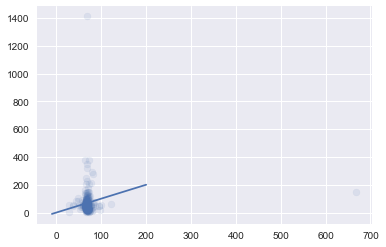

In [57]:
## Plot predicted vs actual 

plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(-10, 200,5),np.linspace(-10,200,5))

In [58]:
# How good is our model on the test set?

# Root Mean Square Error
np.sqrt(np.mean((test_set_pred1 - y_test)**2))

100.6967130500381

In [59]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

43.089573736294035

In [60]:
lr_model1.score(X_test.loc[:,selected_columns_all], y_test)

-0.10286110831323914

In [61]:
list(zip(X_train.columns,lr_model1.coef_))

[('Postal Code', 7.4849483862337524e-06),
 ('Datetime Energy Audit Due', -3.1066872174793843e-17),
 ('land_value_cl', -5.3507339818784997e-08),
 ('structure_value_cl', 7.9625367920391951e-08),
 ('fixtures_value_cl', 2.3159564397557393e-06),
 ('p_prop_value_cl', -1.3905272894048634e-06),
 ('basement_cl', 0.0011731798777036718),
 ('last_sale_price_cl', -3.213205961965829e-08),
 ('year_built_cl', 3.8697481180769741e-05),
 ('building_area_cl', -0.00013577162395952302),
 ('parcel_area_cl', 0.00012379785095874448),
 ('parcel_frontage_cl', -4.1294040037819368e-06),
 ('parcel_depth_cl', 1.7612158465281289e-05),
 ('units_cl', 0.00056037710524849745),
 ('stories_cl', 0.00019815418178594814),
 ('rooms_cl', -0.0023834986710975252),
 ('bathrooms_cl', 0.0036796668725916268),
 ('last_sale_datetime_cl', -2.539179900036971e-18),
 ('Property Type - Self Selected_clean_Adult Education',
  -2.5601561678593915e-09),
 ('Property Type - Self Selected_clean_Automobile Dealership',
  9.8658831764625819e-09),
 

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

(100.69671305003811, 43.089573736294021)

In [64]:
#Let's try cross validation
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([  1.00000000e-03,   2.89426612e-03,   8.37677640e-03,
         2.42446202e-02,   7.01703829e-02,   2.03091762e-01,
         5.87801607e-01,   1.70125428e+00,   4.92388263e+00,
         1.42510267e+01,   4.12462638e+01,   1.19377664e+02,
         3.45510729e+02,   1.00000000e+03,   2.89426612e+03,
         8.37677640e+03,   2.42446202e+04,   7.01703829e+04,
         2.03091762e+05,   5.87801607e+05,   1.70125428e+06,
         4.92388263e+06,   1.42510267e+07,   4.12462638e+07,
         1.19377664e+08,   3.45510729e+08,   1.00000000e+09])

In [65]:
lr_model2 = LassoCV(alphas = alphavec, cv=5)
lr_model2.fit(X_train.loc[:,selected_columns_all],y_train)

/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/laurafedoruk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [66]:
lr_model2.alpha_

0.20309176209047369

In [67]:
list(zip(X_train.columns,lr_model2.coef_))

[('Postal Code', 0.75049757292773012),
 ('Datetime Energy Audit Due', -7.8807838964678601e-18),
 ('land_value_cl', -1.5279203317928349e-07),
 ('structure_value_cl', 1.0037328558809009e-07),
 ('fixtures_value_cl', 3.8774701361302608e-06),
 ('p_prop_value_cl', -1.7625736873886541e-06),
 ('basement_cl', 0.0014579241722415804),
 ('last_sale_price_cl', 7.9912571093718102e-09),
 ('year_built_cl', 0.087787747122749185),
 ('building_area_cl', -0.00019488089605341713),
 ('parcel_area_cl', 0.00013115332043893294),
 ('parcel_frontage_cl', 0.02683915184887917),
 ('parcel_depth_cl', -0.16034923185891356),
 ('units_cl', 0.050906410474709091),
 ('stories_cl', -0.028017384530049715),
 ('rooms_cl', 0.0031009760079584504),
 ('bathrooms_cl', -0.0037963076017867099),
 ('last_sale_datetime_cl', 4.2284241911596631e-18),
 ('Property Type - Self Selected_clean_Adult Education', -0.0),
 ('Property Type - Self Selected_clean_Automobile Dealership',
  -10.968982208479238),
 ('Property Type - Self Selected_clean_

In [68]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns_all])

In [69]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

76.685586194788939

In [70]:
lr_model2.score(X_test.loc[:,selected_columns_all], y_test)

0.36038636051974782

In [71]:
#Parameter scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [74]:
#skitlearn will not give you back a dataframe - it will convert it to a numpy array
type(X_train),type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [75]:
X_train.columns

Index(['Postal Code', 'Datetime Energy Audit Due', 'land_value_cl',
       'structure_value_cl', 'fixtures_value_cl', 'p_prop_value_cl',
       'basement_cl', 'last_sale_price_cl', 'year_built_cl',
       'building_area_cl', 'parcel_area_cl', 'parcel_frontage_cl',
       'parcel_depth_cl', 'units_cl', 'stories_cl', 'rooms_cl', 'bathrooms_cl',
       'last_sale_datetime_cl',
       'Property Type - Self Selected_clean_Adult Education',
       'Property Type - Self Selected_clean_Automobile Dealership',
       'Property Type - Self Selected_clean_Bank Branch',
       'Property Type - Self Selected_clean_Bar/Nightclub',
       'Property Type - Self Selected_clean_College/University',
       'Property Type - Self Selected_clean_Data Center',
       'Property Type - Self Selected_clean_Distribution Center',
       'Property Type - Self Selected_clean_Enclosed Mall',
       'Property Type - Self Selected_clean_Financial Office',
       'Property Type - Self Selected_clean_Fitness Center/Heal

In [76]:
lr_model3 = Lasso(alpha = .7)
lr_model3.fit(X_tr,y_train)

Lasso(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
lr_model3.score(X_te, y_test)

0.42433128817083371

In [78]:
## Let's interpret the coefficients

coefficient_values = list(zip(X_train.columns,lr_model2.coef_))

In [79]:
sorted(coefficient_values, key = lambda x: x[1])


[('Property Type - Self Selected_clean_Non-Refrigerated Warehouse',
  -27.618329736055415),
 ('use_typ_cl_Churches,Convents,Rectories', -23.553842322606336),
 ('Property Type - Self Selected_clean_Distribution Center',
  -19.046534502218009),
 ('Property Type - Self Selected_clean_Worship Facility', -14.595438162096404),
 ('Property Type - Self Selected_clean_Automobile Dealership',
  -10.968982208479238),
 ('parcel_shape_cl_Other', -10.599859057661186),
 ('Property Type - Self Selected_clean_Retail Store', -2.222020917819036),
 ('Energy Audit Status_clean_Did Not Comply', -0.85151564485478626),
 ('parcel_depth_cl', -0.16034923185891356),
 ('stories_cl', -0.028017384530049715),
 ('bathrooms_cl', -0.0037963076017867099),
 ('building_area_cl', -0.00019488089605341713),
 ('p_prop_value_cl', -1.7625736873886541e-06),
 ('land_value_cl', -1.5279203317928349e-07),
 ('Datetime Energy Audit Due', -7.8807838964678601e-18),
 ('Property Type - Self Selected_clean_Adult Education', -0.0),
 ('Proper

In [80]:
selected_top_columns = ['Postal Code', 'use_typ_cl_Hospitals', 'use_typ_cl_Office', 'use_typ_cl_Hotel', 
                        'Property Type - Self Selected_clean_Hotel','Property Type - Self Selected_clean_Laboratory', 
                        'Property Type - Self Selected_clean_Other', 
                        'Property Type - Self Selected_clean_Manufacturing/Industrial Plant',
                        'Property Type - Self Selected_clean_Parking', 'Property Type - Self Selected_clean_Supermarket/Grocery Store',
                        'Property Type - Self Selected_clean_Restaurant', 'Property Type - Self Selected_clean_Data Center']

In [81]:
#Separate our features from our target for linear regression model

X1=df.loc[:,['Postal Code', 'use_typ_cl_Hospitals', 'use_typ_cl_Office', 'use_typ_cl_Hotel', 
                        'Property Type - Self Selected_clean_Hotel','Property Type - Self Selected_clean_Laboratory', 
                        'Property Type - Self Selected_clean_Other', 
                        'Property Type - Self Selected_clean_Manufacturing/Industrial Plant',
                        'Property Type - Self Selected_clean_Parking', 'Property Type - Self Selected_clean_Supermarket/Grocery Store',
                        'Property Type - Self Selected_clean_Restaurant', 'Property Type - Self Selected_clean_Data Center']]

y1=df['2015 Weather Normalized Site EUI (kBtu/ft2)']

In [82]:
lr_model4 = LassoCV(alphas = alphavec, cv=4)
lr_model4.fit(X_train.loc[:,selected_top_columns],y_train)

LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=4, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [83]:
lr_model4.score(X_test.loc[:, selected_top_columns], y_test)

0.52454179843313453

#### What about Random Forest?

In [84]:
from sklearn.externals.six import StringIO

In [85]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'parcel_index', 'Postal Code',
       'Full_Address_clean', 'Building Name_clean',
       'Datetime Energy Audit Due',
       '2015 Weather Normalized Site EUI (kBtu/ft2)', 'address_cl',
       'land_value_cl',
       ...
       'use_typ_cl_Theatres', 'use_typ_cl_Unknown', 'const_typ_cl_Frame',
       'const_typ_cl_Special', 'const_typ_cl_Steel', 'parcel_shape_cl_Other',
       'parcel_shape_cl_Rectanglular', 'parcel_shape_cl_Rectangular',
       'parcel_shape_cl_Square', 'Benchmark 2015 Status_clean_Complied'],
      dtype='object', length=104)

In [86]:
feature_columns = selected_columns_all

In [87]:
len(feature_columns)

97

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
# Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 1000, min_samples_leaf=8, max_features=12, n_jobs=-1)
rfmodel1.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=12, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X1_test)

In [92]:
rfmodel1.score(X1_test, y1_test)

0.010806534783914468

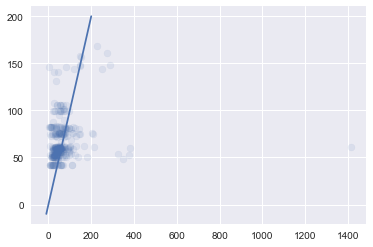

In [93]:
#Plot actual vs predicted
plt.scatter(y1_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(-10, 200, 5),np.linspace(-10, 200, 5))